3. Below are the number of neutrino events detected in 10 second intervals by the IrvineMichigan-Brookhaven experiment on 23rd February 1987. For context the "background" should give a Poisson distribution of neutrino counts, but some kind of "signal" producing excess neutrinos (e.g. a supernova like S1987a which was discovered around this time) would provide an excess of neutrinos in a short interval.

(a) Assuming these are decribed by a Poisson distribution (with a floating mean) find an estimate of the value of the mean, and then compute the $\chi^2$ and $p$-value of this particular set of observations?
(b) Now compute the same but excluding the data in the last bin (i.e. excluding the interval with 9 events)?
(c) Use these results to justify whether this data describes a Poisson background only or not.

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chi2

In [2]:
observation = np.array([1042,860,307,78,15,3,0,0,0,1])
total_obs = np.sum(observation)
frequency = observation/total_obs
total_bin = len(observation)

print (total_obs)

2306


In [3]:
mean_estimate = sum(frequency[event] * event for event in range(total_bin))

mu2_estimate = sum((frequency[event] * event**2 ) for event in range(total_bin))

variance_estimate = mu2_estimate - mean_estimate**2

print (mean_estimate, variance_estimate)

0.777103209019948 0.7777237855317664


In [4]:
factorial = lambda x: 1 if x == 0 else x * factorial(x-1)

In [5]:
poisson = lambda k, lamb: (lamb**k/factorial(k)) * np.exp(-lamb)

print (poisson(0, mean_estimate))

0.4597358428961242


In [6]:
prediction = np.array([poisson(event, mean_estimate) * total_obs for event in range(total_bin)])

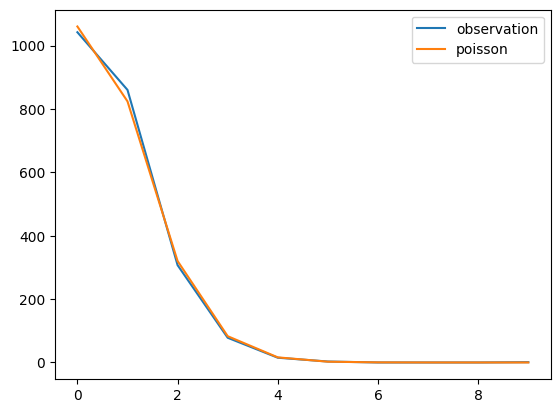

In [8]:
### Plotting
sns.lineplot(x=range(total_bin), y = observation, label = 'observation')
sns.lineplot(x=range(total_bin), y = prediction, label = 'poisson')
plt.legend()
plt.show()

In [70]:
### finding chi2
chi2 = sum((observation[event] - prediction[event])**2 for event in range(total_bin))
print (chi2)

1835.0872028930844


In [79]:
### finding the p-value
chi2_distribution = stats.chi2(total_bin - 1)
p_value = 1 - chi2_distribution.cdf(chi2)
print (p_value)

0.999998642903253


In [72]:
### Reset the data to remove the last bin
observation = np.array([1042,860,307,78,15,3,0,0,0])
total_obs = np.sum(observation)
frequency = observation/total_obs
total_bin = len(observation)

In [73]:
mean_estimate = sum(frequency[event] * event for event in range(9))

mu2_estimate = sum((frequency[event] * event**2 ) for event in range(9))

variance_estimate = mu2_estimate - mean_estimate**2

print (mean_estimate, variance_estimate)

0.7735357917570499 0.7487139623848937


In [74]:
prediction = np.array([poisson(event, mean_estimate) * total_obs for event in range(total_bin)])

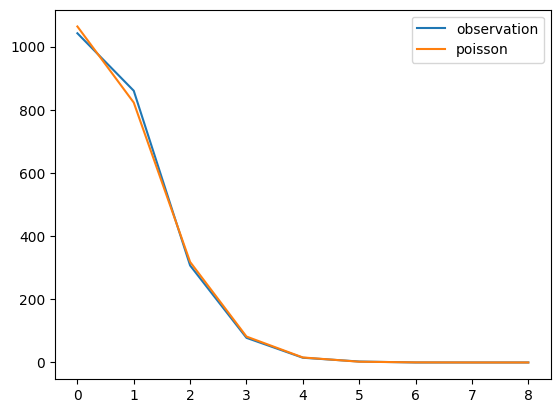

In [75]:
### Plotting
sns.lineplot(x=range(total_bin), y = observation, label = 'observation')
sns.lineplot(x=range(total_bin), y = prediction, label = 'poisson')
plt.legend()
plt.show()

In [76]:
### finding chi2
chi2 = sum((observation[event] - prediction[event])**2 for event in range(total_bin))
print (chi2)

1999.4282424849835


In [78]:
### finding the p-value
chi2_distribution = stats.chi2(total_bin - 1)
p_value = 1 - chi2_distribution.cdf(chi2)
print (p_value)

0.999998642903253


In [ ]:
### given large p-value, the model fits data very well (maybe too well)?